In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
plt.style.use(plt.style.available[-2])

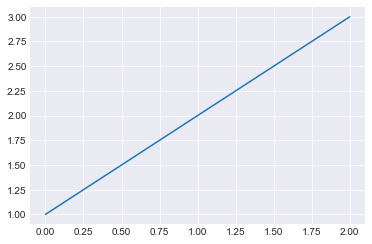

In [9]:
plt.plot([1,2,3])

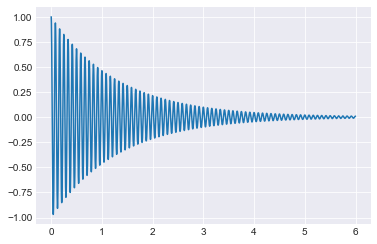

In [12]:
bins = np.linspace(0, 6, 4048)
omega = 1/12.
sig = np.exp(-bins/1.3) * np.cos(2*np.pi*bins/omega)
plt.plot(bins, sig)

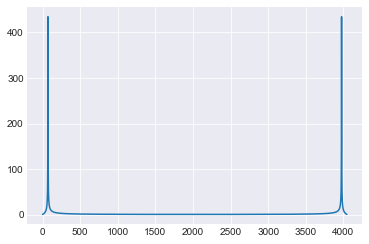

In [13]:
spec = np.abs(np.fft.fft(sig))
plt.plot(spec)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


(0, 5000)

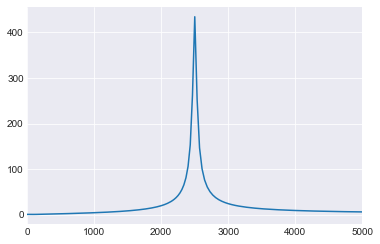

In [14]:
dt = np.diff(bins)[0]
freqs = np.fft.fftfreq(spec.size, d=dt)
plt.plot(3e4/freqs, spec)
plt.xlim(0, 5000)

In [15]:
1/12.

0.08333333333333333

In [16]:
1e7/4600

2173.913043478261

In [17]:
a = np.arange(11, dtype='float')
print(a)
np.digitize(np.array([1.5, 1.1, 9.1]), a)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


array([ 2,  2, 10], dtype=int64)

In [18]:
import attr

In [26]:
np.linspace(0,1, 3+1), np.linspace(0,1, 6+1)[1::2]

(array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 array([ 0.16666667,  0.5       ,  0.83333333]))

In [33]:
speed_of_light = 299792458.

def mm_to_fs(mm):
    t = (mm * 0.001 / speed_of_light)* 1e15
    return t

In [34]:
mm_to_fs(300)/1e6

1.0006922855944562

In [43]:
def fs_to_mm(t_fs):
    dist = t_fs * 1e-15 * speed_of_light * 1000
    return dist
fs_to_mm(1e6)

299.79245800000007

0.29979245800000004